## Ejercicio 1

**Enunciado:** Entrena y ajusta un árbol de decisión para el conjunto de datos _moons_.

a. Genera el conjunto de datos usando `make_moons(n_samples=10000, noise=0.4)`.

b. Divídelo en conjunto de entrenamiento y prueba utilizando `train_test_split()`.

c. Utiliza _GridSearchCV_ para buscar buenos hiperparámetros (prueba varios valores de `max_leaf_nodes`, `max_depth` y `min_samples_split`).

d. Entrena el modelo con los mejores hiperparámetros y evalúa la precisión en el conjunto de prueba (se espera alrededor de 85% a 87% de precisión).

## Librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
#  1. Generar el conjunto de datos moons
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [4]:
#  2. Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#  3. Configurar la búsqueda de hiperparámetros con GridSearchCV
param_grid = {
    "max_leaf_nodes": [10, 20, 50, 100, 200],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10]
}

In [6]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_leaf_nodes': [10, 20, 50, 100, 200],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [7]:
#  4. Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

Mejores hiperparámetros: {'max_depth': None, 'max_leaf_nodes': 20, 'min_samples_split': 2}


In [14]:
#  5. Entrenar el modelo con los mejores hiperparámetros
best_tree = DecisionTreeClassifier(**best_params, random_state=42)
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=20, random_state=42)

In [15]:
#  6. Evaluar el modelo en el conjunto de prueba
y_pred = best_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")

Precisión en el conjunto de prueba: 0.8700


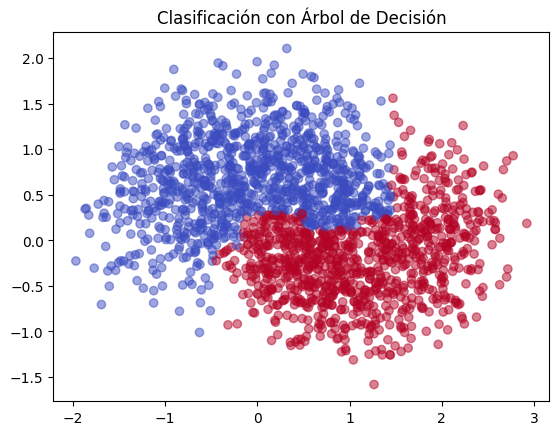

In [16]:
# 7. Visualizar la clasificación
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap="coolwarm", alpha=0.5)
plt.title("Clasificación con Árbol de Decisión")
plt.show()

## Conclusión
un 87% de accuracy nos indica que es un buen modelo y esta aprendiendo bien a separar entre las diferentes Features del dataset, se puede observar en el grafico que se diferencia correctamente 